In [118]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import json
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
%matplotlib inline


from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

plt.style.use('seaborn-white')

import statsmodels.api as sm

pd.options.display.max_columns = 50
pd.options.display.max_colwidth = 300

In [2]:
evergreen = pd.read_csv('../datasets/train.tsv', sep='\t', na_values='?')

# Extract the title and body from the boilerplate JSON text
evergreen['title'] = evergreen.boilerplate.map(lambda x: json.loads(x).get('title', ''))
evergreen['body'] = evergreen.boilerplate.map(lambda x: json.loads(x).get('body', ''))

In [7]:
evergreen = pd.get_dummies(evergreen, columns=['alchemy_category'])

In [15]:
evergreen['is_recipe'] = evergreen['title'].fillna('').str.contains('recipe')

In [29]:
evergreen.dropna(inplace=True)

In [16]:
evergreen.columns

Index([u'url', u'urlid', u'boilerplate', u'alchemy_category_score',
       u'avglinksize', u'commonlinkratio_1', u'commonlinkratio_2',
       u'commonlinkratio_3', u'commonlinkratio_4', u'compression_ratio',
       u'embed_ratio', u'framebased', u'frameTagRatio', u'hasDomainLink',
       u'html_ratio', u'image_ratio', u'is_news', u'lengthyLinkDomain',
       u'linkwordscore', u'news_front_page', u'non_markup_alphanum_characters',
       u'numberOfLinks', u'numwords_in_url', u'parametrizedLinkRatio',
       u'spelling_errors_ratio', u'label', u'title', u'body',
       u'alchemy_category_arts_entertainment', u'alchemy_category_business',
       u'alchemy_category_computer_internet',
       u'alchemy_category_culture_politics', u'alchemy_category_gaming',
       u'alchemy_category_health', u'alchemy_category_law_crime',
       u'alchemy_category_recreation', u'alchemy_category_religion',
       u'alchemy_category_science_technology', u'alchemy_category_sports',
       u'alchemy_category_u

In [20]:
evergreen.dtypes

url                                     object
urlid                                    int64
boilerplate                             object
alchemy_category_score                 float64
avglinksize                            float64
commonlinkratio_1                      float64
commonlinkratio_2                      float64
commonlinkratio_3                      float64
commonlinkratio_4                      float64
compression_ratio                      float64
embed_ratio                            float64
framebased                               int64
frameTagRatio                          float64
hasDomainLink                            int64
html_ratio                             float64
image_ratio                            float64
is_news                                float64
lengthyLinkDomain                        int64
linkwordscore                            int64
news_front_page                        float64
non_markup_alphanum_characters           int64
numberOfLinks

In [14]:
evergreen['label'].describe()

count    7395.000000
mean        0.513320
std         0.499856
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: label, dtype: float64

In [21]:
evergreen.head(3)

,url,urlid,boilerplate,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label,title,body,alchemy_category_arts_entertainment,alchemy_category_business,alchemy_category_computer_internet,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather,is_recipe
0,http://www.bloomberg.com/news/2010-12-23/ibm-predicts-holographic-calls-air-breathing-batteries-by-2015.html,4042,"{""title"":""IBM Sees Holographic Calls Air Breathing Batteries ibm sees holographic calls, air-breathing batteries"",""body"":""A sign stands outside the International Business Machines Corp IBM Almaden Research Center campus in San Jose California Photographer Tony Avelar Bloomberg Buildings stand at...",0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,0.443783,0.0,0,0.090774,0,0.245831,0.003883,1.0,1,24,0.0,5424,170,8,0.152941,0.079130,0,"IBM Sees Holographic Calls Air Breathing Batteries ibm sees holographic calls, air-breathing batteries",A sign stands outside the International Business Machines Corp IBM Almaden Research Center campus in San Jose California Photographer Tony Avelar Bloomberg Buildings stand at the International Business Machines Corp IBM Almaden Research Center campus in the Santa Teresa Hills of San Jose Califor...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
1,http://www.popsci.com/technology/article/2012-07/electronic-futuristic-starting-gun-eliminates-advantages-races,8471,"{""title"":""The Fully Electronic Futuristic Starting Gun That Eliminates Advantages in Races the fully electronic, futuristic starting gun that eliminates advantages in races the fully electronic, futuristic starting gun that eliminates advantages in races"",""body"":""And that can be carried on a pla...",0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,0.468649,0.0,0,0.098707,0,0.203490,0.088652,1.0,1,40,0.0,4973,187,9,0.181818,0.125448,1,"The Fully Electronic Futuristic Starting Gun That Eliminates Advantages in Races the fully electronic, futuristic starting gun that eliminates advantages in races the fully electronic, futuristic starting gun that eliminates advantages in races",And that can be carried on a plane without the hassle too The Omega E Gun Starting Pistol Omega It s easy to take for granted just how insanely close some Olympic races are and how much the minutiae of it all can matter The perfect example is the traditional starting gun Seems easy You pull a tr...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False
2,http://www.menshealth.com/health/flu-fighting-fruits?cm_mmc=Facebook-_-MensHealth-_-Content-Health-_-FightFluWithFruit,1164,"{""title"":""Fruits that Fight the Flu fruits that fight the flu | cold & flu | men's health"",""body"":""Apples The most popular source of antioxidants in our diet one apple has an antioxidant effect equivalent to 1 500 mg of vitamin C Apples are loaded with protective flavonoids which may prevent hea...",0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,0.525448,0.0,0,0.072448,0,0.226402,0.120536,1.0,1,55,0.0,2240,258,11,0.166667,0.057613,1,Fruits that Fight the Flu fruits that fight the flu | cold & flu | men's health,Apples The most popular source of antioxidants in our diet one apple has an antioxidant effect equivalent to 1 500 mg of vitamin C Apples are loaded with protective flavonoids which may prevent heart disease and cancer Next Papayas With 250 percent of the RDA of vitamin C a papaya can help kick ...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False

## Build a feature matrix where X contains useful features and y contains the target variable label

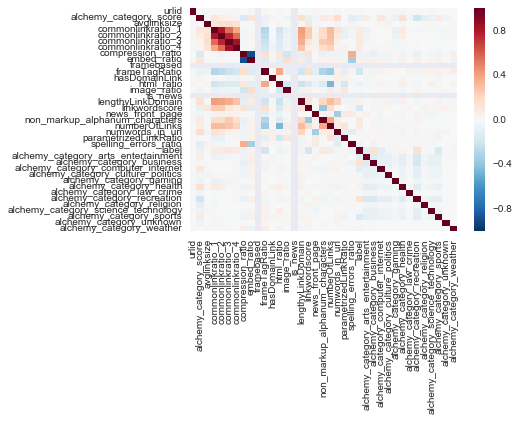

In [11]:
sb.heatmap(evergreen.corr())

## Build a Logistic Regression model using scikit-learn and then!¶
* Examine the coefficients using the examine_coefficients function provided
* Evaluate the AUC, precision and recall of the model using cross-validation
* Plot the ROC curve
* Iterate on the model by adding in additional features in X above

In [3]:
def examine_coefficients(model, df):
    return pd.DataFrame(
        { 'Coefficient' : model.coef_[0] , 'Feature' : df.columns}
    ).sort_values(by='Coefficient')

In [22]:
evergreen.columns

Index([u'url', u'urlid', u'boilerplate', u'alchemy_category_score',
       u'avglinksize', u'commonlinkratio_1', u'commonlinkratio_2',
       u'commonlinkratio_3', u'commonlinkratio_4', u'compression_ratio',
       u'embed_ratio', u'framebased', u'frameTagRatio', u'hasDomainLink',
       u'html_ratio', u'image_ratio', u'is_news', u'lengthyLinkDomain',
       u'linkwordscore', u'news_front_page', u'non_markup_alphanum_characters',
       u'numberOfLinks', u'numwords_in_url', u'parametrizedLinkRatio',
       u'spelling_errors_ratio', u'label', u'title', u'body',
       u'alchemy_category_arts_entertainment', u'alchemy_category_business',
       u'alchemy_category_computer_internet',
       u'alchemy_category_culture_politics', u'alchemy_category_gaming',
       u'alchemy_category_health', u'alchemy_category_law_crime',
       u'alchemy_category_recreation', u'alchemy_category_religion',
       u'alchemy_category_science_technology', u'alchemy_category_sports',
       u'alchemy_category_u

In [27]:
evergreen.dtypes

url                                     object
urlid                                    int64
boilerplate                             object
alchemy_category_score                 float64
avglinksize                            float64
commonlinkratio_1                      float64
commonlinkratio_2                      float64
commonlinkratio_3                      float64
commonlinkratio_4                      float64
compression_ratio                      float64
embed_ratio                            float64
framebased                               int64
frameTagRatio                          float64
hasDomainLink                            int64
html_ratio                             float64
image_ratio                            float64
is_news                                float64
lengthyLinkDomain                        int64
linkwordscore                            int64
news_front_page                        float64
non_markup_alphanum_characters           int64
numberOfLinks

In [48]:
y = evergreen['label']
x = evergreen[['avglinksize', 'commonlinkratio_1', 'commonlinkratio_2',
       'commonlinkratio_3', 'commonlinkratio_4', 'compression_ratio',
       'embed_ratio', 'framebased', 'frameTagRatio', 'hasDomainLink',
       'html_ratio', 'image_ratio', 'is_news', 'lengthyLinkDomain',
       'linkwordscore', 'news_front_page', 'non_markup_alphanum_characters',
       'numberOfLinks', 'numwords_in_url', 'parametrizedLinkRatio',
       'spelling_errors_ratio',
       'alchemy_category_arts_entertainment', 'alchemy_category_business',
       'alchemy_category_computer_internet',
       'alchemy_category_culture_politics', 'alchemy_category_gaming',
       'alchemy_category_health', 'alchemy_category_law_crime',
       'alchemy_category_recreation', 'alchemy_category_religion',
       'alchemy_category_science_technology', 'alchemy_category_sports',
       'alchemy_category_unknown', 'alchemy_category_weather', 'is_recipe']]

logit = LogisticRegression()
model = logit.fit(x,y)
print "Model 1 score:", model.score(x,y)


Model 1 score: 0.699745547074


In [42]:
y_pred = model.predict(x)
confusion = np.array(confusion_matrix(y, y_pred))
print "Here is a confusion matrix. It is confusing: \n", confusion

conmat = np.array(confusion_matrix(y, y_pred))

confusion2 = pd.DataFrame(conmat, index=['Y=0', 'Y=1'],
                         columns=['Y-hat = 0', 'Y-hat = 1'])

print "\nHere is a pretty confusion matrix. It is still confusing, but at least it's pretty: \n", confusion2

Here is a confusion matrix. It is confusing: 
[[1137  569]
 [ 493 1338]]

Here is a pretty confusion matrix. It is still confusing, but at least it's pretty: 
     Y-hat = 0  Y-hat = 1
Y=0       1137        569
Y=1        493       1338


In [47]:
print classification_report(y, y_pred)

             precision    recall  f1-score   support

          0       0.70      0.67      0.68      1706
          1       0.70      0.73      0.72      1831

avg / total       0.70      0.70      0.70      3537



In [113]:
y3 = evergreen['label']
x3 = evergreen[['spelling_errors_ratio',
                'commonlinkratio_3',
                'frameTagRatio',
                'html_ratio',
                'linkwordscore', 'news_front_page',
                'numberOfLinks', 'numwords_in_url', 
       'alchemy_category_business', 'alchemy_category_computer_internet',
       'alchemy_category_health', 'alchemy_category_recreation', 'alchemy_category_sports']]

logit3 = sm.Logit(y3, x3) #set up a STATSMODELS Logistic Regression
result3 = logit3.fit() # FIT your Logistic Regression to your data

print result3.summary() # See the results of your Logistic Regression
predictions = result3.predict(x3) # Get predictions for x's

Optimization terminated successfully.
         Current function value: 0.589104
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                 3537
Model:                          Logit   Df Residuals:                     3524
Method:                           MLE   Df Model:                           12
Date:                Wed, 19 Oct 2016   Pseudo R-squ.:                  0.1493
Time:                        20:14:52   Log-Likelihood:                -2083.7
converged:                       True   LL-Null:                       -2449.5
                                        LLR p-value:                7.603e-149
                                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
spelling_errors_ratio                 -2.7201      0.735    

In [114]:
y4 = evergreen['label']
x4 = evergreen[['commonlinkratio_3', 'framebased', 'frameTagRatio',
       'html_ratio', 'linkwordscore', 'news_front_page',
       'numberOfLinks', 'numwords_in_url',
       'spelling_errors_ratio', 'alchemy_category_business',
       'alchemy_category_computer_internet',
       'alchemy_category_health',
       'alchemy_category_recreation', 'alchemy_category_sports', 'is_recipe']]

logit4 = LogisticRegression()
model4 = logit2.fit(x4,y4)
print "Model 4 score:", model4.score(x4,y4)

Model 4 score: 0.710489115069


In [116]:
y_pred4 = model4.predict(x4)
conmat4 = np.array(confusion_matrix(y4, y_pred4))

confusion4 = pd.DataFrame(conmat4, index=['Y=0', 'Y=1'],
                         columns=['Y-hat = 0', 'Y-hat = 1'])

print "\nHere is a pretty confusion matrix: \n", confusion4


Here is a pretty confusion matrix: 
     Y-hat = 0  Y-hat = 1
Y=0       1149        557
Y=1        467       1364


In [117]:
print classification_report(y4, y_pred4)

             precision    recall  f1-score   support

          0       0.71      0.67      0.69      1706
          1       0.71      0.74      0.73      1831

avg / total       0.71      0.71      0.71      3537



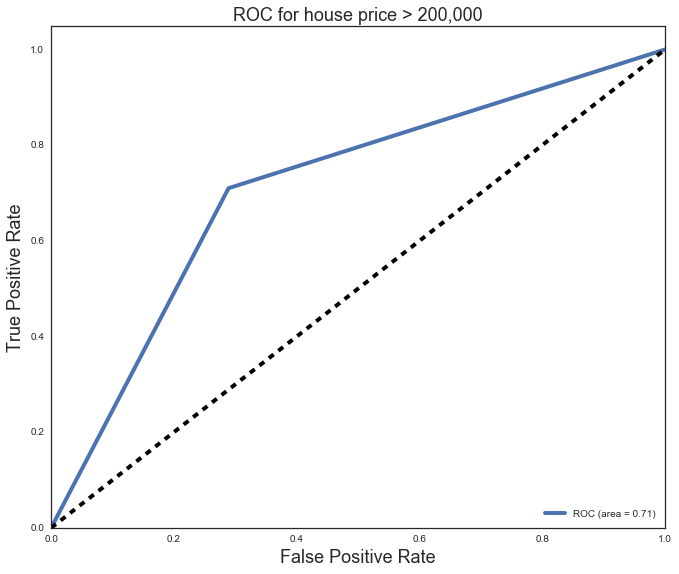

In [121]:
# generic curve plotting function
def auc_plotting_function(rate1, rate2, rate1_name, rate2_name, curve_name):
    AUC = auc(rate1, rate2)
    # Plot of a ROC curve for class 1 (has_cancer)
    plt.figure(figsize=[11,9])
    plt.plot(rate1, rate2, label=curve_name + ' (area = %0.2f)' % AUC, linewidth=4)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel(rate1_name, fontsize=18)
    plt.ylabel(rate2_name, fontsize=18)
    plt.title(curve_name + ' for house price > 200,000', fontsize=18)
    plt.legend(loc="lower right")
    plt.show()

# plot receiving operator characteristic curve
def plot_roc(y_true, y_score):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    auc_plotting_function(fpr, tpr, 'False Positive Rate', 'True Positive Rate', 'ROC')
    
plot_roc(y_pred4, y4)

In [98]:
y2 = evergreen['label']
x2 = evergreen[['avglinksize', 'commonlinkratio_1', 'commonlinkratio_2',
       'commonlinkratio_3', 'commonlinkratio_4', 'compression_ratio',
       'embed_ratio', 'framebased', 'frameTagRatio', 'hasDomainLink',
       'html_ratio', 'lengthyLinkDomain',
       'linkwordscore', 'news_front_page',
       'numberOfLinks', 'numwords_in_url', 'parametrizedLinkRatio',
       'spelling_errors_ratio', 'alchemy_category_business',
       'alchemy_category_computer_internet',
       'alchemy_category_health',
       'alchemy_category_recreation', 'alchemy_category_sports', 'is_recipe']]

logit2 = LogisticRegression()
model2 = logit2.fit(x2,y2)
print "Model 2 score:", model2.score(x2,y2)

Model 2 score: 0.710771840543


# Code from Richard

```
# To find accuracy!

logit = LogisticRegression()
model = logit.fit(x, y)
print model.score(x, y) # This is your accuracy!

from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix!

y_pred = model.predict(x)
confusion = np.array(confusion_matrix(y, y_pred)) 

# If you want a pretty confusion matrix:

conmat = np.array(confusion_matrix(y, y_pred))

confusion = pd.DataFrame(conmat, index=['Y=0', 'Y=1'],
                         columns=['Y-hat = 0', 'Y-hat = 1'])

# Precision and Recall!

classification_report(y, y_pred)


# EXAMPLE text feature 'recipe'
data['is_recipe'] = data['title'].fillna('').str.contains('recipe')
```